In [2]:
#Allgemeine Imports:

import numpy as np
from numpy.linalg import norm
from scipy.linalg import lu, solve_triangular
import matplotlib.pyplot as plt

Die Allgemeine Gleichung sieht wie folgt aus:

\begin{align*}

\displaystyle \vec{p} = \vec{f}(\theta_1, \theta_2) = \begin{pmatrix} p_x\\ p_y \end{pmatrix} = \begin{pmatrix} L_1 * cos(\theta_1) + L_2 * cos(\theta_1 + \theta_2)\\ L_1 * sin(\theta_1) + L_2 * sin(\theta_1 + \theta_2) \end{pmatrix}

\end{align*}

In [3]:
#Definition der Konstanten:
L1 = 2
L2 = 1

In [4]:
def F(t):
    p = np.array([2,1])
    print(p)
    p = [L1*np.cos(t[0]) + L2 *np.cos(t[0]+t[1]), L1*np.sin(t[0]) + L2 *np.sin(t[0]+t[1])]
    return p


In [5]:
#Teste die Funktion:

theta = [np.pi/2, np.pi/2]

# sollte den Punkt P = (-1/2) ergeben, da beide Winkel 90 Grad sind
P = F(theta)
print(np.round(P, 10))

[2 1]
[-1.  2.]


Die Gleichung von oben muss für die Newton Iteration als Nullstellenform formuliert werden:

\begin{align*}

\displaystyle \begin{pmatrix} L_1 * cos(\theta_1) + L_2 * cos(\theta_1 + \theta_2) -p_x\\ L_1 * sin(\theta_1) + L_2 * sin(\theta_1 + \theta_2) - p_y \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}

\end{align*}

In [6]:
#Nullstellenform
def F(t):
    p = np.array([2,1])
    p = [L1*np.cos(t[0]) + L2 *np.cos(t[0]+t[1]) - P[0], L1*np.sin(t[0]) + L2 *np.sin(t[0]+t[1]) - P[1]]
    return p

test_f = F(theta)
#Sollte nun [0, 0] ergeben:
print(test_f)

[0.0, 0.0]


In [7]:
#Jacobi-Matrix
def dF(t):
    dp = np.array([2,2])
    dp = [[-L1*np.sin(t[0]) - L2*np.sin(t[0]+t[1]), -L2*np.sin(t[0]+t[1])],[L2*np.cos(t[0]+t[1])+L1*np.cos(t[0]), L2*np.cos(t[0]+t[1])]]
    return dp

test_df = dF(theta)
print(np.round(test_df, 5))

[[-2. -0.]
 [-1. -1.]]


In [8]:
#Teste die Newtoniteration bei Theta1 = Theta2 = pi/2 --> p = [-1, 2]
P = [-1,2]
#Anfangswinkel
a0 = [1, 1]
#Anzahl Iterationen:
iter = 15

def Newton(t):
    for step in range(0, iter):
        A = dF(t)
        b = F(t)
        #LU Zerlegung
        P, L, U = lu(A)
        z = solve_triangular(L, P.T@b, lower=True) # Vorwärtseinsetzen
        delta = solve_triangular(U, z, lower=False) #Rückwärtseinsetzen
        t -= delta  #Newton Schritt
        res = np.linalg.norm(F(t)) #Berechne 
     
    return t
        
t_k = Newton(a0)


## Newtonverfahren mit Abbruchsbedingung von 14 Bit Genauigkeit
14 Bit Genauigkeit: $\frac{1}{2^{14}} = 0.000061 = 6.1e-5$

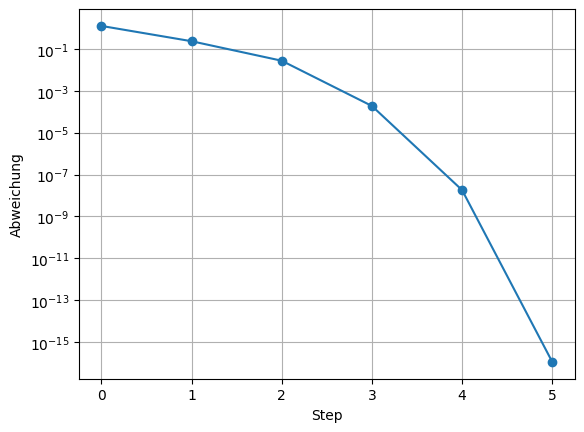

In [9]:
#Teste die Newtoniteration bei Theta1 = Theta2 = pi/2 --> p = [-1, 2]
#P = [-1, 2]

def Newton(t):
    #Anfangswinkel
    a0 = [np.pi / 2, np.pi / 2]
    #Anzahl Iterationen:
    iter = 1000
    # Tolerance
    tol = 6.1e-9

    step = 0
    res_k = np.array([]) #?
    res = np.linalg.norm(F(t))
    while res > tol and step < iter:
        A = dF(t)
        b = F(t)
        #LU Zerlegung
        P, L, U = lu(A)
        z = solve_triangular(L, P.T@b, lower=True) # Vorwärtseinsetzen
        delta = solve_triangular(U, z, lower=False) #Rückwärtseinsetzen
        t -= delta  #Newton Schritt
        res = np.linalg.norm(F(t)) #Berechne 
        step += 1
        #print(step, t, res)
        res_k = np.append(res_k,[res],axis= 0)
    return t, res_k


a_k, res_k= Newton(a0)
plt.plot(res_k, marker="o")
plt.xlabel('Step')
plt.ylabel('Abweichung')
plt.grid()
plt.yscale("log")
plt.show()

## Kovergenzverhalten
- Genauigkeiten in Abhängigkeit der Interationen plotten (loglog oder halblog):\
&emsp; Siehe plot.

- Welches konvergenzverhalten erwarten Sie?\
&emsp; Beim Newton verfahren eine quadratische.

- Mit Fehlern experimentieren (andere Vorzeichen, andere Vorfaktor). Wie ändert sich die Konvergenz?\
&emsp; Beim Winkel: Bei grösseren Werten verhält sich die Konvergenz zu beginn Linar (oder einach schlechter als quadratisch), hat man aber einen geeigneten Punkt gefunden, strebt man quadratisch zur Lösungs.\
&emsp; Beim Punkt: Werte die nicht erreichbar sind geben keine Lösung -> es konvergiert nicht.

- Was schliessen Sie daraus für die Entwicklung effizienter Verfahren?\
&emsp; 1. Abbruchkriterium implementieren (mit print Error) um endlose While-Schlaufen zu verhindern. 2.Bei Eingabe prüfen ob die Eingabe stimmt, resp. erreichbar ist. 3. Bei grossen Zahlenerreis, resp. wenn viel Interationen erwartet werden, es sehr genau werden muss -> Newtonverfahren. Bei sehr kleinen überschaubaren Rechnungen -> Fixpunktiteration. Da der Rechenaufwand selbst kleiner ist.

## Robustheit
- Konvergiert das Verfahren immer?\
&emsp; Nein. Zeigt die Tangente immer in die flasche Richtung, kann es sogar sein das man die Lösung nie erreicht.

- Effizente Strategie zur Whal der Startwerte:\
&emsp; Am besten Ploten man die Menge kurz, und wählt einen Wert der in der Nähe der Lösungsmenge liegt. Dadurch wird es um einiges schneller gerechnet und es ist unwahrscheinlicher das das Verfahren fehlschlägt.

- Startwerte für die keine Lösung existiert:\
&emsp; -> gibt es keine Lösung -> konvergiert nicht.

- Wie sind die Punkte mit existierender Lösung charakterisiert:\
&emsp; -> Es konvergiert schneller wenn der Startwert nahe an der echten Lösung liegt. Da es sich um trigonometrische Funktionen handelt, landet man auch nicht ausserhalb des Definitionsbereichs. -> mit einem Punkt bei welchem eine Lösung existert kann das verfahren nicht fehlschlagen.

## Ein- oder Mehrdeutigkeit der Lösung:
- Ist die Lösung eindeutig?\
&emsp; Nein, es gibt für jeden Punkt genau zwei Lösungen (ausser der Arm ist voll gestreckt). Da die beiden Winkel vom kleinen und grossen Arm variert werden können.

## Abfahren einer Trajektorie

Graphische Darstellung: 
- Stellen Sie den Verlauf der beiden Winkel in Abhängigkeit des Geradenparameters t graphisch dar.

Optimierung des Startwertes:
- Wählen Sie den Startwert optimal aufgrund der Struktur der vorliegenden Aufgabenstellung.


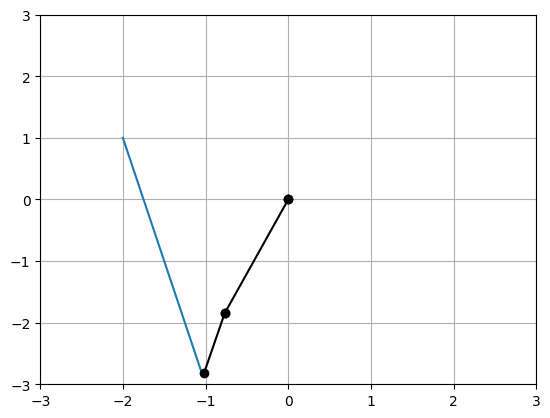

In [10]:
def Bahn(t):
    p0 = np.array([1, -2])
    d = 1/(np.sqrt(17)) * np.array([-4, 1])
    #print(p0 + t*d)
    return p0 + t*d

def draw_robot(n):
    x1 = L1 * np.cos(angle[n, 0])
    y1 = L1 * np.sin(angle[n, 0])
    x2 = x1 + L2 *np.cos(angle[n, 0]+angle[n, 1])
    y2 = y1 + L2 *np.sin(angle[n, 0]+angle[n ,1])
    line1, = plt.plot([0, y1], [0, x1], 'ko-')
    line2, = plt.plot([y1, y2], [x1, x2], 'ko-')
    
ak = np.zeros([1,2])
ak = [np.pi, 3*np.pi/2]
zeit_bahn = np.linspace(0,4,401)
P_trajectory = np.zeros([401, 2])
angle = np.zeros([401,2])
P = Bahn(zeit_bahn[0])
for i in range(0, zeit_bahn.shape[0]):
    P = Bahn(zeit_bahn[i])
    P_trajectory[i] = P
    a_k_new, res_k = Newton(a_k)
    angle[i] = a_k_new
    a_k = a_k_new
    #print(a_k, P)
P_x = P_trajectory[:,1]
P_y = P_trajectory[:,0]
#print(angle)
plt.plot(P_x, P_y)
plt.plot(0,0, marker="o", color='black')
draw_robot(400)
plt.grid()

plt.ylim((-3,3))
plt.xlim((-3,3))
plt.show()


# GLS


[1 1]
[1 1]
[]


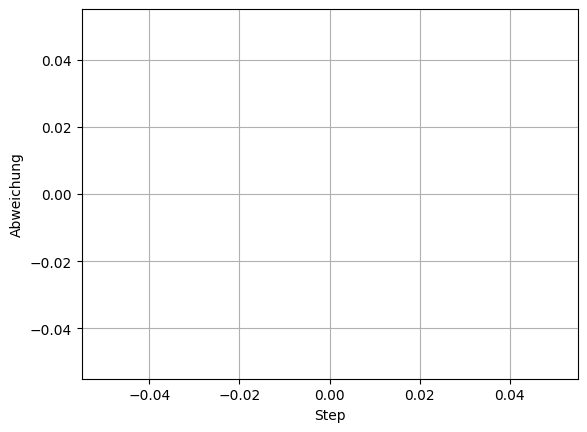

In [11]:
def Newton(t):

    iter = 1000
    # Tolerance
    tol = 6.1e-9

    step = 0
    res_k = np.array([]) 
    res = np.linalg.norm(F(t))
    while res > tol and step < iter:
        A = dF(t)
        b = F(t)
        #LU Zerlegung
        P, L, U = lu(A)
        z = solve_triangular(L, P.T@b, lower=True) # Vorwärtseinsetzen
        delta = solve_triangular(U, z, lower=False) #Rückwärtseinsetzen
        t -= delta  #Newton Schritt
        res = np.linalg.norm(F(t)) #Berechne 
        step += 1
        #print(step, t, res)
        res_k = np.append(res_k,[res],axis= 0)
    return t, res_k






def F(t):
    p = [[t[0]**2+2*t[1]**2-3],[2*np.sin(t[0])*np.sin(t[1]-1)]]
    return p


def dF(t):
    J = [[2*t[0],4*t[1]],[2*np.cos(t[0])*np.sin(t[1]-1),2*np.sin(t[0])*np.cos(t[1]-1)]]

    return J




x0 =np.array([1,1])
print(x0)

a_k, res_k= Newton(x0)
print(a_k)
print(res_k)

plt.plot(res_k, marker="o")
plt.xlabel('Step')
plt.ylabel('Abweichung')
plt.grid()
plt.show()

# Serie 14 4a GLS mit Solver

start value: [1.5 0. ]
Found solution after 21 iterations: x = [-0.63523267 -1.13940323] 

start value: [1.21352549 0.88167788]
Found solution after 13 iterations: x = [-1.59575261  0.47622138] 

start value: [0.46352549 1.42658477]
Exceeded maximum iterations. No solution found.

start value: [-0.46352549  1.42658477]
Found solution after 11 iterations: x = [-1.59575261  0.47622138] 

start value: [-1.21352549  0.88167788]
Found solution after 5 iterations: x = [-1.59575261  0.47622138] 

start value: [-1.5000000e+00  1.8369702e-16]
Found solution after 5 iterations: x = [-1.59575261  0.47622138] 

start value: [-1.21352549 -0.88167788]
Found solution after 5 iterations: x = [-0.63523267 -1.13940323] 

start value: [-0.46352549 -1.42658477]
Found solution after 4 iterations: x = [-0.63523267 -1.13940323] 

start value: [ 0.46352549 -1.42658477]
Found solution after 5 iterations: x = [-0.63523267 -1.13940323] 

start value: [ 1.21352549 -0.88167788]
Found solution after 7 iterations: x

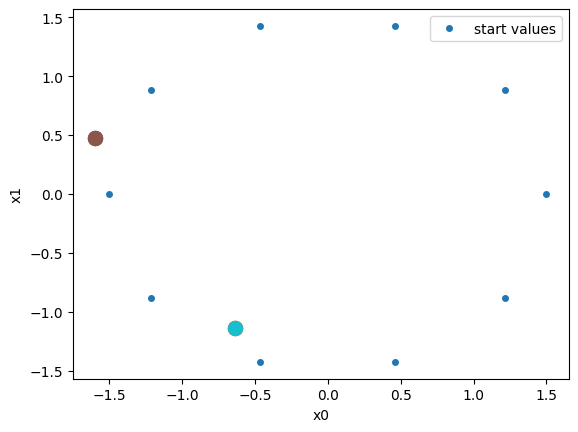

In [12]:
import numpy as np
import scipy as sp
import sympy as sym
import matplotlib.pyplot as plt




def newton_solver(f, J, x, tol = 1e-10, max_iter = 100):
    for i in range(max_iter):
        if np.linalg.norm(f(x)) < tol:
            print('Found solution after',i,'iterations: x =',x,'\n')
            return x
        delta = np.linalg.solve(J(x), f(x))
        x = x - delta

    print('Exceeded maximum iterations. No solution found.\n')
    return None


    

def f(x):
    return np.array([
        x[0]**2 + 2*x[1]**2 - 3,
        2*np.sin(x[0])*np.sin(x[1]-1)-1
    ])

def Df(x):
    return np.array([
        [2*x[0], 4*x[1]],
        [2*np.sin(x[1]-1)*np.cos(x[0]), 2*np.sin(x[0])*np.cos(x[1]-1)]
    ])

# both solutions are inside the circle with radius 2 => define 10 starting points on the circle with radius 1.5
xa = []
for k in range(10):
    xa.append(np.array([1.5*np.cos(k*2.0*np.pi/10.0), 1.5*np.sin(k*2.0*np.pi/10.0)]))
xa = np.array(xa)
solutions = []
for xak in xa:
    print('start value:', xak)
    solutions.append(newton_solver(f, Df, xak))

# plot solutions
plt.figure()
plt.plot(xa[:, 0], xa[:, 1], 'o', markersize=4, label='start values')
for sol in solutions:
    if sol is not None:
        plt.plot(sol[0], sol[1], 'o', markersize=10)
plt.legend()
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

# Serie 14 4b

start value: [1.5 0. ]
Found solution after 13 iterations: x = [-0.15611105  0.82932376] 

start value: [1.21352549 0.88167788]
Found solution after 10 iterations: x = [-0.15611105  0.82932376] 

start value: [0.46352549 1.42658477]
Found solution after 9 iterations: x = [-0.15611105  0.82932376] 

start value: [-0.46352549  1.42658477]
Found solution after 7 iterations: x = [-0.15611105  0.82932376] 

start value: [-1.21352549  0.88167788]
Found solution after 8 iterations: x = [-0.18588911  0.79260442] 

start value: [-1.5000000e+00  1.8369702e-16]
Found solution after 8 iterations: x = [ 0.05235878 -1.05105545] 

start value: [-1.21352549 -0.88167788]
Found solution after 6 iterations: x = [ 0.05235878 -1.05105545] 

start value: [-0.46352549 -1.42658477]
Found solution after 5 iterations: x = [ 0.05235878 -1.05105545] 

start value: [ 0.46352549 -1.42658477]
Found solution after 4 iterations: x = [ 0.05235878 -1.05105545] 

start value: [ 1.21352549 -0.88167788]
Found solution afte

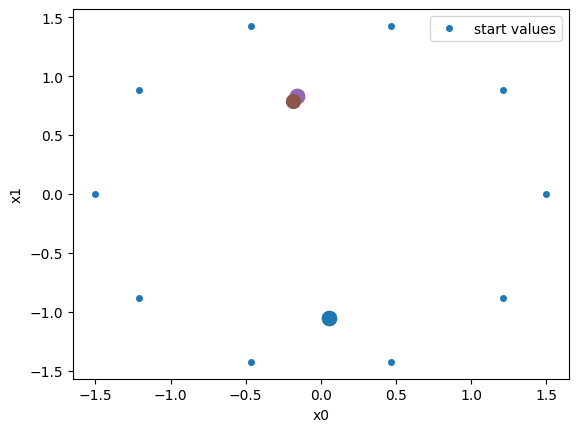

In [13]:
def newton_solver(f, J, x, tol = 1e-10, max_iter = 100):
    for i in range(max_iter):
        if np.linalg.norm(f(x)) < tol:
            print('Found solution after',i,'iterations: x =',x,'\n')
            return x
        delta = np.linalg.solve(J(x), f(x))
        x = x - delta

    print('Exceeded maximum iterations. No solution found.\n')
    return None


    

def f(x):
    return np.array([
        np.exp(x[0]**2-2*x[1]**2)+2*x[0]*x[1],
        x[1]**2-2*x[0]-1
    ])

def Df(x):
    return np.array([
        [np.exp(x[0]**2-2*x[1]**2)*2*x[0]+2*x[1],np.exp(x[0]**2-2*x[1]**2)*-4*x[1]+2*x[0]],
        [-2,2*x[1]]
    ])
# all Start values are inside the circle to find the solutions faster
# both solutions are inside the circle with radius 2 => define 10 starting points on the circle with radius 1.5
xa = []
for k in range(10):
    xa.append(np.array([1.5*np.cos(k*2.0*np.pi/10.0), 1.5*np.sin(k*2.0*np.pi/10.0)]))
xa = np.array(xa)
solutions = []
for xak in xa:
    print('start value:', xak)
    solutions.append(newton_solver(f, Df, xak))

# plot solutions
plt.figure()
plt.plot(xa[:, 0], xa[:, 1], 'o', markersize=4, label='start values')
for sol in solutions:
    if sol is not None:
        plt.plot(sol[0], sol[1], 'o', markersize=10)
plt.legend()
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()